# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [23]:
import numpy as np
from sklearn.datasets import fetch_openml
from scipy.io import loadmat
import matplotlib
import matplotlib.pyplot as plt


In [24]:
from scipy.io import loadmat
mnist= loadmat('mnist-original.mat')
X= mnist['data'].T
y= mnist['label'].T

### Now take a look at the shapes of the X and y matricies 

In [25]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000, 1)


### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [26]:
X[36000]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  86, 131, 225, 225, 225,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

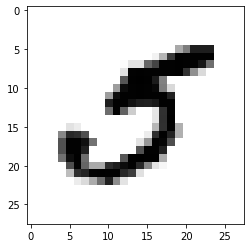

In [27]:
plt.imshow(X[36000].reshape(28,28), cmap=matplotlib.cm.binary, interpolation='nearest')

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [28]:
X_train, y_train = X[:60000], y[:60000]
X_test, y_test = X[60000:], y[60000:]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 784) (60000, 1) (10000, 784) (10000, 1)


### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [29]:
X_train = X[0:60000]
X_test = X[60000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [30]:
from sklearn.model_selection import train_test_split 

In [31]:
y_train = np.where(y[0:60000] == 5, 1, 0)
y_test = np.where(y[60000:] == 5, 1, 0)

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\vitoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vitoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Does the classifier predict correctly the 36000th digit we picked before?

In [34]:
lr.predict([X[36000]]).item()
# Correct prediction

1

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [35]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [36]:
never_5_clf.fit(X_train, y_train)

In [37]:
y_pred_n5 = never_5_clf.predict(X_test)

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_pred_lr = lr.predict(X_test)

print('Logistic regression')
print('====================')
print('Confusion matrix')
print(confusion_matrix(y_test, y_pred_lr))
print('-------------------')
print(f'Accuracy = {accuracy_score(y_test, y_pred_lr).round(4)}')
print(f'Precision = {precision_score(y_test, y_pred_lr, zero_division=0).round(4)}')
print(f'Recall = {recall_score(y_test, y_pred_lr).round(4)}')
print(f'F1 score = {f1_score(y_test, y_pred_lr).round(4)}')

print('\nNever 5 classifier')
print('====================')
print('Confusion matrix')
print(confusion_matrix(y_test, y_pred_n5))
print('-------------------')
print(f'Accuracy = {accuracy_score(y_test, y_pred_n5).round(4)}')
print(f'Precision = {precision_score(y_test, y_pred_n5, zero_division=0).round(4)}')
print(f'Recall = {recall_score(y_test, y_pred_n5).round(4)}')
print(f'F1 score = {f1_score(y_test, y_pred_n5).round(4)}')

Logistic regression
Confusion matrix
[[9034   74]
 [ 147  745]]
-------------------
Accuracy = 0.9779
Precision = 0.9096
Recall = 0.8352
F1 score = 0.8708

Never 5 classifier
Confusion matrix
[[9108    0]
 [ 892    0]]
-------------------
Accuracy = 0.9108
Precision = 0.0
Recall = 0.0
F1 score = 0.0


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [39]:
# Despite a seemlingly good accuracy, the Never 5 classifier has no precision nor recall / sensitivity.

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

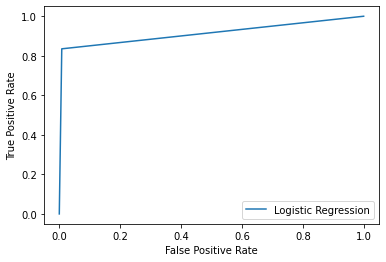

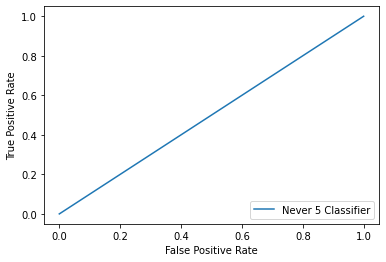

In [40]:
from sklearn.metrics import roc_curve, RocCurveDisplay, auc

# Logistic regression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test,y_pred_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
display_lr = RocCurveDisplay(fpr=fpr_lr, tpr=tpr_lr)
display_lr.plot(name = 'Logistic Regression')

# Never 5 classifier
fpr_n5, tpr_n5, thresholds_n5 = roc_curve(y_test,y_pred_n5)
roc_auc_n5 = auc(fpr_n5, tpr_n5)
display_n5 = RocCurveDisplay(fpr=fpr_n5, tpr=tpr_n5)
display_n5.plot(name = 'Never 5 Classifier')

plt.show()

### Now find the roc_auc_score for each. 

In [41]:
from sklearn.metrics import roc_auc_score

print(f' ROC_AUC score for Logisitic Regression = {roc_auc_score(y_test, y_pred_lr).round(4)}')
print(f' ROC_AUC score for Never 5 Classifier = {roc_auc_score(y_test, y_pred_n5).round(4)}')

 ROC_AUC score for Logisitic Regression = 0.9135
 ROC_AUC score for Never 5 Classifier = 0.5


### What does this metric tell you? Which classifier works better with this metric in mind?

In [42]:
# AUC ROC is equal to 100% for a perfect model and to 50% for a non-informative one.
# The Logistic Regression model works very well (score of 91%)
# while the Never 5 Classifier is non-informative.